In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd # 

In [2]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [3]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) 
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] 
    columnNames = list(df)
    if len(columnNames) > 10: 
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [4]:
nRowsRead = 1000 
df1 = pd.read_csv('../input/malware-analysis-datasets-raw-pe-as-image/raw_pe_images.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'raw_pe_images.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 1026 columns


In [5]:
df1.head(5)

hash  pix_0  pix_1  pix_2  pix_3  pix_4  pix_5  \
0  b324140e1fb35dc6b694879ba1f2be45     15     15    239     15    223     36   
1  1d32b1326a524b163eb74af645cd34d5    234    196      8     20    182     56   
2  e44fea4913fc9fd91b8b07c4670aeac4    196    255      5     97     35    112   
3  95badb16d862ba94ae85c44e4b31d749    232    252    183     39     51      1   
4  f30f32a4f42678ef49a543356d580232     81     84    204    228    255    157   

   pix_6  pix_7  pix_8  ...  pix_1015  pix_1016  pix_1017  pix_1018  pix_1019  \
0    102    243    102  ...        31       242       245       169       212   
1     27    223    144  ...       189       228       156        54       189   
2    219    189    217  ...       254       189       227       255       192   
3    255     87     94  ...       210        52        55        95       230   
4     76    254    128  ...        24        69        64        53        52   

   pix_1020  pix_1021  pix_1022  pix_1023  malware  
0        17       255       160       122        1  
1        82       177       125       193        1  
2       231       253       196       233        1  
3        48        53       103        65        1  
4       216       200        55        58        1  

[5 rows x 1026 columns]

In [6]:
plotPerColumnDistribution(df1, 10, 5)

<Figure size 2400x512 with 0 Axes>

In [7]:
plotCorrelationMatrix(df1, 256)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


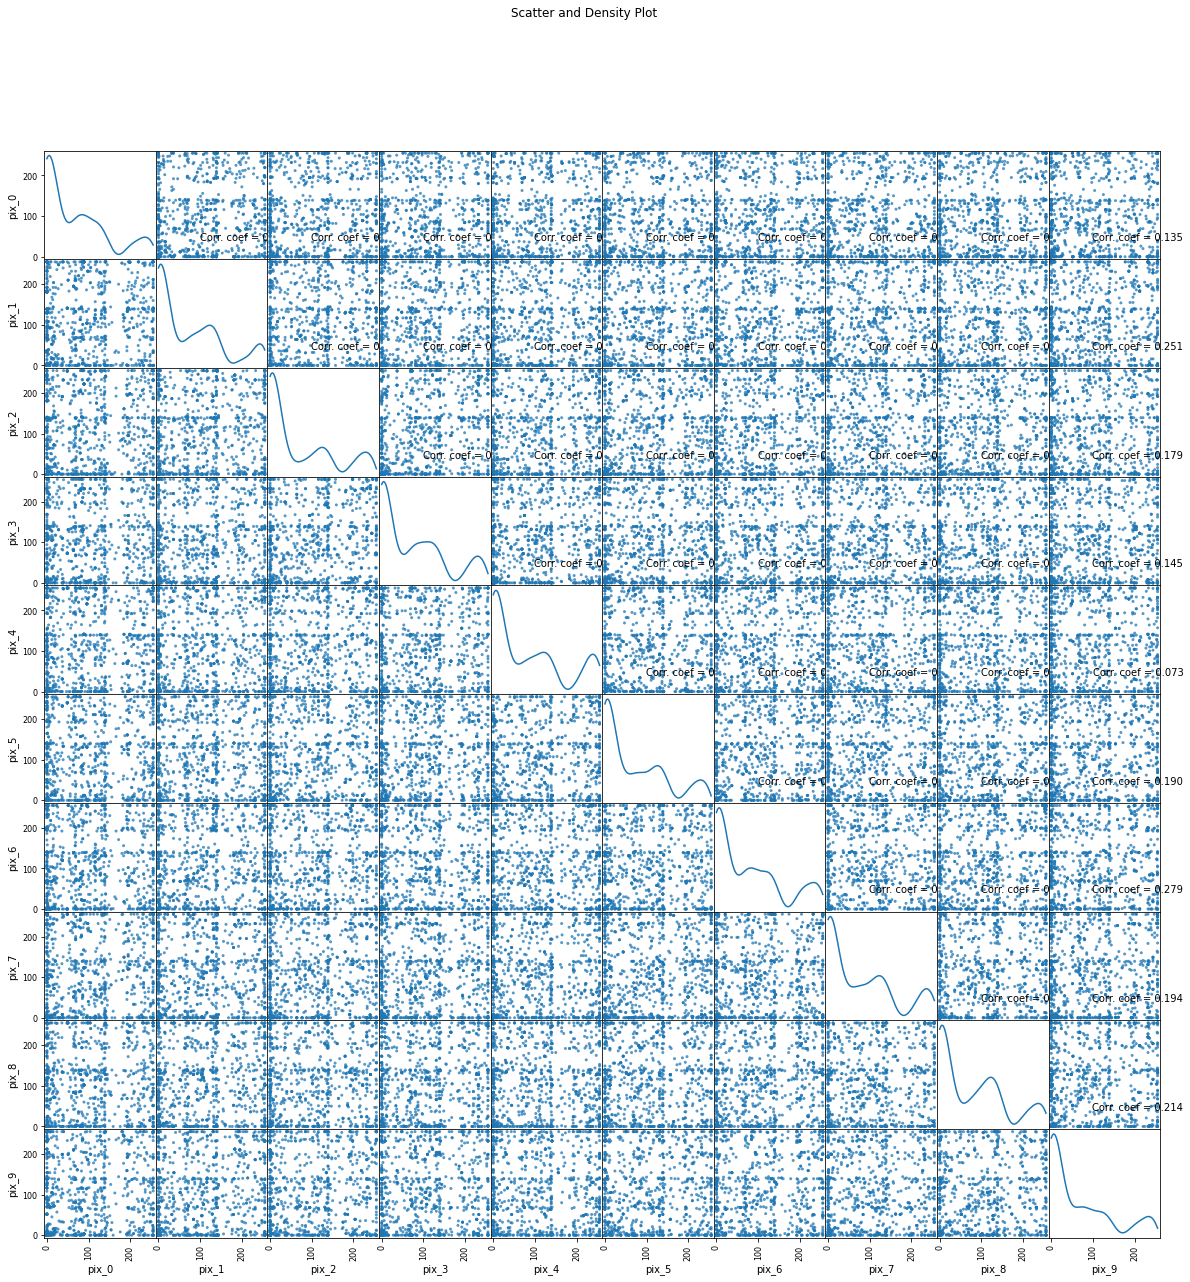

In [8]:
plotScatterMatrix(df1, 20, 10)